In [3]:
# 导入需要的包
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import os 
import warnings
#显示设置
warnings.filterwarnings("ignore")
matplotlib.pyplot.rcParams['font.sans-serif']=['simhei'] #中文图例
pd.set_option('display.max_columns', 50)  #最多显示5列
pd.set_option('display.max_rows', 1000) #最多显示10行
matplotlib.rcParams['axes.unicode_minus']=False
colorset = [(255/256,0/256,0/256),(4/256,78/256,126/256),(255/256,128/256,128/256),(129/256,166/256,190/256),
                  (255/256,178/256,178/256),(180/256,202/256,216/256),(255/256,51/256,51/256),
                  (54/256,113/256,152/256),(0/256,0/256,0/256),(128/256,128/256,128/256)
                 ] #作图颜色

In [2]:
import pandas as pd
import torch
import torch.utils.data as data

import os
import random 

In [4]:
dataroot='input/'

In [5]:
from dataset import get_dataloader
from tqdm import tqdm
from method.Index_extract import Index_extract

data_loader = get_dataloader(dataroot)
local_progress=tqdm(data_loader)

Betas=torch.zeros([len(data_loader),70]).cuda().detach() 
Return_rates=torch.zeros([len(data_loader)-1,10]).cuda().detach() 
ReOEF=torch.zeros([len(data_loader)-1,1]).cuda().detach() 
ReSP=torch.zeros([len(data_loader)-1,70]).cuda().detach() 

N=4680
K=800
J=400
for i,(SP,OEF) in enumerate(local_progress):
    Index=Index_extract(OEF,SP,N,K,J)
    if i!=0:
        (close_nowOEF,close_nowSP)=Index.get_close()
        close_diffSP=close_nowSP-close_tempSP
        close_diffOEF=close_nowOEF-close_tempOEF
        
        re_rate=close_diffSP[groups_temp].mean(1)#组内等权
        ReOEF[i-1,:]=close_diffOEF
        ReSP[i-1,:]=close_diffSP
        Return_rates[i-1,:]=re_rate
        
    groups_temp=Index.get_group() #当日分组情况:7*10
    (close_tempOEF,close_tempSP)=Index.get_close()  #当日收盘价
    Betas[i,:]=Index.get_beta()

date_num: 251


100%|████████████████████████████████████████████████████████████████████████████████| 251/251 [00:22<00:00, 11.40it/s]


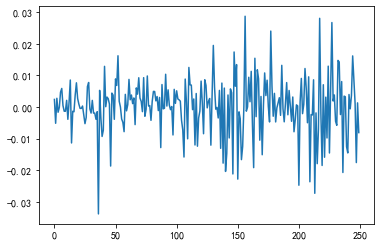

In [228]:
plt.plot(ReOEF.tolist())

In [6]:
Return_rates.shape

torch.Size([250, 10])

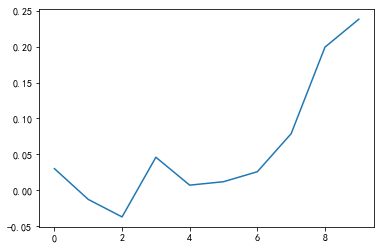

In [7]:
plt.plot(Return_rates.sum(0).tolist())

In [1133]:
from scipy.stats import spearmanr, pearsonr

spearmanr(Return_rates.mean(0).tolist(),np.arange(10)) #秩相关系数检验

SpearmanrResult(correlation=0.6969696969696969, pvalue=0.02509667588225183)

In [1134]:
res=(Return_rates[:,7:].mean(1)-Return_rates[:,0:3].mean(1)).tolist() #组合日收益率t检验
from scipy import stats as ss 
ss.ttest_1samp(res,0)

Ttest_1sampResult(statistic=1.673922214978958, pvalue=0.09540151991366742)

In [1139]:
xx=sm.add_constant(res)
yy=np.array((ReOEF.view(250)).tolist()).reshape(250)
model = sm.OLS(yy,xx)
results = model.fit()

In [1141]:
results .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     57.86
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           5.83e-13
Time:                        01:32:55   Log-Likelihood:                 847.09
No. Observations:                 250   AIC:                            -1690.
Df Residuals:                     248   BIC:                            -1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.500      0.618      -0.001       0.001
x1             0.5872      0.077      7.607      0.000       0.435       0.739
==============================================================================
Omnibus:                       41.984   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.767
Skew:                          -0.881   Prob(JB):                     1.30e-17
Kurtosis:                       5.088   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1136]:
len(res)

250

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
p_value = acorr_ljungbox(res) 

In [ ]:
p_value

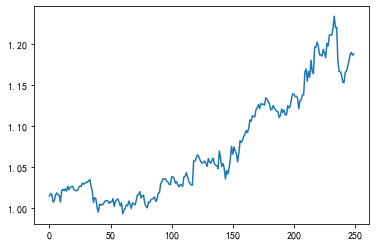

In [26]:
plt.plot((np.array(res)+1).cumprod())

### 双重排序

In [844]:
CAPS=pd.read_csv('input/SP100_MarketCap_70stocks_2017.csv').iloc[:,1:]

In [845]:
CAPS

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,...,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71
0,72007.1345,271480.1013,293537.5344,117338.1000,168396.4909,432245.7065,239488.3904,391398.6163,166752.7997,61904.6437,120656.9835,90740.1630,189562.5944,218779.7472,187569.8840,198189.6073,92986.7528,85611.2200,30034.5566,112225.0410,83818.5808,154713.3698,42379.7350,16657.24395,79789.8608,...,51882.2886,70811.5911,29038.0690,54256.1582,39786.6891,31548.8995,70510.2305,29840.6082,28077.7749,102991.3467,45107.18816,38465.5850,75162.2788,23900.2828,63039.3117,60515.0712,21303.6659,24025.9640,59125.4992,36824.5932,80483.5575,13012.5417,45728.0463,16630.4651,57628.0101
1,73605.3836,270546.5046,293046.0114,122066.2200,172829.5756,424138.5478,241015.2243,389130.8340,167169.0746,64697.4587,120859.5414,91621.1354,190211.5345,215962.8406,185906.0624,199148.2532,92120.4454,85915.4010,29391.0308,108736.0091,82798.1452,153209.1818,43181.0325,16764.71004,83207.7598,...,52491.9743,71269.5698,29516.2890,53848.0312,39682.6036,31512.1435,70794.8967,29780.4608,27594.2374,103697.4417,44794.45480,38293.6504,76589.7021,24456.6293,63099.5308,61240.2851,21616.5169,24076.1750,59249.9739,36808.2630,80612.3828,13650.9539,46001.7303,16772.0583,57399.7366
2,73081.2266,269121.5412,291374.8332,121662.6000,172890.3028,427171.4417,239084.2285,387172.2947,165781.4915,63937.2842,120184.3484,91413.8478,189634.6989,212582.5526,185048.1544,197522.7233,92213.0986,84814.0560,29159.7637,110957.7983,81206.2657,153797.7771,42676.5118,17104.07664,83406.0679,...,51488.9430,70784.6511,29525.4855,53848.0312,39175.1867,31512.1435,70494.4157,29637.6109,27827.8566,103369.0254,44196.58220,37930.6774,76589.7021,24158.1019,62908.8371,61424.4664,21445.1937,23523.8540,58887.8656,36457.1638,79603.2519,13640.1562,45461.9645,16775.4296,57009.4626
3,73442.1216,270497.3679,294225.6666,121143.6600,173861.9378,423730.2736,240027.2730,387069.2137,166336.5248,63226.6863,119846.7520,92553.9298,188625.2366,211643.5838,185958.0568,195897.1934,94381.1835,85328.0170,29119.5434,112406.0757,80594.0043,155759.7615,42884.2556,17296.38438,82741.1524,...,51331.6047,71821.8382,29534.6821,54058.2785,39220.7241,31622.4115,70328.3604,29757.9056,27463.8452,103598.9168,44214.97828,37720.5351,76865.9776,24257.6110,63420.6990,61815.8517,21340.9101,23561.5122,58616.2844,36677.6214,79850.1669,13642.8557,45461.9645,16863.0826,57134.6448
4,79542.9647,268138.8078,294520.5804,121258.9800,172890.3028,420464.0802,240251.8074,387069.2137,165642.7332,62532.6139,120150.5888,92346.6422,188697.3410,212457.3568,185334.1237,197522.7233,94543.3266,85128.7260,28868.1661,109460.1478,80247.0562,153972.1757,42795.2226,17403.85047,83137.7687,...,51547.9448,70959.7606,29893.3470,54157.2184,39435.4005,31295.6915,69585.0654,29630.0924,27284.0309,104025.8580,44500.11752,37625.0159,77541.3176,24438.5367,62698.0704,61988.5217,20428.4279,23448.5375,58650.2320,36938.9046,79528.1038,14271.8199,44929.8011,16687.7766,57200.9178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,898555.9431,311666.7366,659674.5909,151761.4875,517144.9385,218556.0000,239052.6600,303088.2922,372822.0132,199595.7109,190576.6329,216985.4581,215419.9624,49971.5616,95422.6771,196051.5507,59685.5257,94978.8187,355789.7973,563000.1744,81526.4400,739386.1549,290935.4817,103258.80280,95312.4438,...,90375.8889,156785.3648,72008.7652,219688.5477,53414.7110,99092.3971,53317.2803,102626.4243,141183.1851,110364.2269,55855.25790,101465.1960,92660.9054,55297.2071,175755.2221,105850.5906,128065.1436,162542.6507,168666.2021,81950.3287,48474.4904,37453.0289,136653.5535,85705.9497,71926.4195
2765,875759.5978,310623.6752,658825.9860,151154.4415,513613.6441,215654.4000,239789.3400,301020.1024,371330.0313,197718.4695,190230.5

In [846]:
CAPS=torch.tensor(CAPS[:251].values).cuda().detach()

In [847]:
#市值二分 剩下35 分五组每组7个

In [851]:
M=23
LCAPSindex=CAPS.sort().indices[:,:M]
MCAPSindex=CAPS.sort().indices[:,M:70-M]
HCAPSindex=CAPS.sort().indices[:,70-M:]

In [852]:
LCAPbeta=torch.zeros([251,M]).cuda().detach() 
HCAPbeta=torch.zeros([251,M]).cuda().detach() 
MCAPbeta=torch.zeros([251,70-2*M]).cuda().detach() 
for i in range(251):
    LCAPbeta[i]=Betas[i,LCAPSindex[i]]
    HCAPbeta[i]=Betas[i,HCAPSindex[i]]
    MCAPbeta[i]=Betas[i,MCAPSindex[i]]

In [853]:
LCAPSP=torch.zeros([250,M]).cuda().detach() 
HCAPSP=torch.zeros([250,M]).cuda().detach() 
MCAPSP=torch.zeros([251,70-2*M]).cuda().detach() 
for i in range(250):
    LCAPSP[i]=ReSP[i,LCAPSindex[i]]
    HCAPSP[i]=ReSP[i,HCAPSindex[i]]
    MCAPSP[i]=ReSP[i,MCAPSindex[i]]

In [854]:
LCAPbeta[0].sort().indices[:7].shape

torch.Size([7])

LCAPRe1=torch.zeros([250]).cuda().detach() 
LCAPRe2=torch.zeros([250]).cuda().detach() 
LCAPRe3=torch.zeros([250]).cuda().detach() 
LCAPRe4=torch.zeros([250]).cuda().detach() 
LCAPRe5=torch.zeros([250]).cuda().detach() 
HCAPRe1=torch.zeros([250]).cuda().detach() 
HCAPRe2=torch.zeros([250]).cuda().detach() 
HCAPRe3=torch.zeros([250]).cuda().detach() 
HCAPRe4=torch.zeros([250]).cuda().detach() 
HCAPRe5=torch.zeros([250]).cuda().detach() 
for i in range(150):
    LCAPRe1[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[:7]]).mean()
    LCAPRe2[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[7:14]]).mean()
    LCAPRe3[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[14:21]]).mean()
    LCAPRe4[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[21:28]]).mean()
    LCAPRe5[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[28:35]]).mean()
    HCAPRe1[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[:7]]).mean()
    HCAPRe2[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[7:14]]).mean()
    HCAPRe3[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[14:21]]).mean()
    HCAPRe4[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[21:28]]).mean()
    HCAPRe5[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[28:35]]).mean()
RES=LCAPRe1+HCAPRe1-LCAPRe5-HCAPRe5

In [876]:
NN=4
LCAPRe1=torch.zeros([250]).cuda().detach() 
LCAPRe2=torch.zeros([250]).cuda().detach() 
 
HCAPRe1=torch.zeros([250]).cuda().detach() 
HCAPRe2=torch.zeros([250]).cuda().detach() 

MCAPRe1=torch.zeros([250]).cuda().detach() 
MCAPRe2=torch.zeros([250]).cuda().detach()

for i in range(150):
    LCAPRe1[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[:NN]]).mean()
    LCAPRe2[i]=(LCAPSP[i,LCAPbeta[i].sort().indices[M-NN:M]]).mean()
    
    HCAPRe1[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[:NN]]).mean()
    HCAPRe2[i]=(HCAPSP[i,HCAPbeta[i].sort().indices[M-NN:M]]).mean()
    
    MCAPRe1[i]=(MCAPSP[i,MCAPbeta[i].sort().indices[:NN]]).mean()
    MCAPRe2[i]=(MCAPSP[i,MCAPbeta[i].sort().indices[M-NN:M]]).mean()

In [1143]:
RES=-LCAPRe1-HCAPRe1+LCAPRe2+HCAPRe2

In [1144]:
ss.ttest_1samp(RES.tolist(),0)

Ttest_1sampResult(statistic=2.0433994821471417, pvalue=0.042065581273620846)

In [1145]:
LCAPRe1=LCAPSP[LCAPbeta.sort().indices[:,:7]]

In [1146]:
xx=sm.add_constant(RES.tolist())
yy=np.array((ReOEF.view(250)).tolist()).reshape(250)
model = sm.OLS(yy,xx)
results = model.fit()
results .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.446
Date:                Thu, 21 Apr 2022   Prob (F-statistic):            0.00681
Time:                        02:09:33   Log-Likelihood:                 824.58
No. Observations:                 250   AIC:                            -1645.
Df Residuals:                     248   BIC:                            -1638.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.279e-05      0.001     -0.075      0.940      -0.001       0.001
x1             0.0938      0.034      2.729      0.007       0.026       0.161
==============================================================================
Omnibus:                       18.081   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.279
Skew:                          -0.380   Prob(JB):                     3.60e-08
Kurtosis:                       4.647   Cond. No.                         60.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conditional CAPM

In [1]:
RMF=pd.read_csv('input/Factors_daily.CSV',index_col=0)
RMF=RMF[1:]
RMF#250

NameError: name 'pd' is not defined

In [960]:
RMF=RMF*0.01

In [961]:
RMF['OEF']=(np.array(ReOEF[:].tolist())).reshape(250)

In [962]:
RMF['OEF-RF']=RMF['OEF']-RMF['RF']

In [1128]:
import statsmodels.api as sm
# 模型训练

bbb=[]
aaa=[]
rrr=[]
for i in range(70):
    #temp=np.polyfit(ReSP[50*N:50*(N+1),i].tolist(),ReOEF[50*N:50*(N+1)].tolist(),deg=1)
    #temp=np.polyfit(ReSP[:,i].tolist(),RMF[],deg=1)
    X= sm.add_constant(RMF[['OEF']].values)
    model = sm.OLS(ReSP[:,i].tolist(),X).fit()
    bbb.append(list(model.params))
    aaa.append(list(model.pvalues))
    rrr.append((model.resid**2).sum())

In [1123]:
aaa=np.array(aaa)
bbb=np.array(bbb)

In [1124]:
np.count_nonzero(aaa < 0.05, axis=0)

array([ 8, 70], dtype=int64)

In [1125]:
bbb[:,1]

array([1.22510465, 1.4887321 , 0.96766019, 1.13748459, 1.12739084,
       1.20275488, 1.1176804 , 0.91068719, 1.39830127, 0.91438951,
       1.2729979 , 1.16312474, 0.84578601, 0.92879591, 1.18004217,
       0.84355507, 1.77985719, 1.79034707, 0.93574265, 1.13963991,
       1.01834124, 1.16243788, 0.79389695, 1.38864767, 0.68149052,
       1.26604893, 0.77535659, 0.8515139 , 1.42975254, 1.05956495,
       0.80415823, 0.92000961, 0.47334996, 0.38580237, 0.59114298,
       1.09311094, 1.10564583, 1.18755307, 1.49620386, 0.55889306,
       0.90838461, 0.89871072, 0.83313036, 0.53154635, 1.29464316,
       0.99373401, 0.4860561 , 1.15139407, 0.57454171, 1.02011129,
       1.68131337, 0.74163087, 1.39803387, 1.4616153 , 0.58339505,
       0.89736031, 1.11414034, 0.68192951, 0.84105614, 0.9106581 ,
       0.59416374, 0.79465382, 0.78427398, 0.81337571, 0.91102049,
       0.69652441, 1.62303028, 1.30177432, 0.53404548, 0.74723621])

In [1065]:
bbb[:,1].argsort()

array([33, 32, 46, 43, 68, 39, 48, 54, 34, 60, 24, 57, 65, 51, 69, 26, 62,
       22, 61, 30, 63, 42, 58, 15, 12, 27, 55, 41, 40, 59,  7, 64,  9, 31,
       13, 18,  2, 45, 20, 49, 29, 35, 36, 56,  6,  4,  3, 19, 47, 21, 11,
       14, 37,  5,  0, 25, 10, 44, 67, 23, 52,  8, 28, 53,  1, 38, 66, 50,
       16, 17], dtype=int64)

In [1104]:
# 带入模型
# sp=OEF*beta_spot

In [1120]:
R2=[]
for i in range(70):
    PreSPi=RMF['OEF'].values*Betas[:-1,i].cpu().numpy()
    tempy=np.array(PreSPi)
    tempx=np.array(ReSP[:,i].tolist())
    R2.append(((tempx-tempy)**2).sum())

In [1096]:
bbb=[]
aaa=[]

for i in range(70):
    #temp=np.polyfit(ReSP[50*N:50*(N+1),i].tolist(),ReOEF[50*N:50*(N+1)].tolist(),deg=1)
    #temp=np.polyfit(ReSP[:,i].tolist(),RMF[],deg=1)
    XXXX=ReSP[:,i].cpu().numpy()-RMF['OEF'].values*Betas[:-1,i].cpu().numpy()
    reg.fit(RMF[['Mkt-RF']],XXXX)
    bbb.append(reg.coef_)
    aaa.append(reg.intercept_)

In [1130]:
ss.ttest_1samp(aaa,0)

Ttest_1sampResult(statistic=array([10.55450041,  1.14624876]), pvalue=array([4.81116536e-16, 2.55651887e-01]))

##  Beta& K,J

In [13]:
# Beta& K,J
(SP,OEF)=next(iter(data_loader))

In [15]:
SP.shape

torch.Size([1, 4680, 70])

In [18]:
SP=SP[:,:,10]

In [24]:
SP=SP.view(1,-1,1)

In [31]:
betas=torch.zeros([2000,2000,1],device=OEF.device)
for k in range(2000):
    for j in range(k+1,2000):
        Index=Index_extract(OEF,SP,N,k,j)
        betas[k,j]=Index.get_beta(k,j)

In [33]:
betas.shape

torch.Size([2000, 2000, 1])

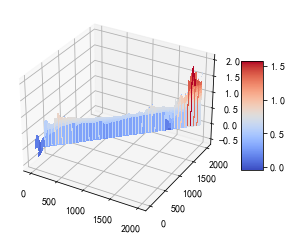

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
 
fig= plt.figure()
ax = fig.gca(projection='3d')
 
# Make data.
X = np.arange(2000)
Y = np.arange(2000)
Z = (betas.view(2000,2000))
 
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
 
# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
 
plt.show()


In [38]:
betas2=torch.zeros([2000,1000,1],device=OEF.device)
for j in range(2000):
    for add in range(1,1000):
        Index=Index_extract(OEF,SP,N,j+add,j)
        betas2[j,add]=Index.get_beta()

ZeroDivisionError: float division by zero

In [42]:
print(j,add)

1841 998


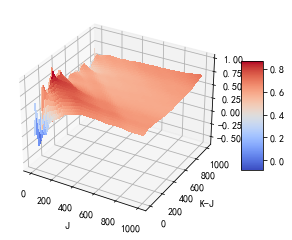

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
 
fig= plt.figure()
ax = fig.gca(projection='3d')
 
# Make data.
X = np.arange(1000)
Y = np.arange(1000)
X,Y=np.meshgrid(X,Y)
Z = (betas2.view(2000,1000))[0:1000,:]
 
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
 
# Customize the z axis.
ax.set_xlabel('J')
ax.set_ylabel('K-J')
ax.set_zlabel('beta')
 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
 
plt.show()


## Fama-MacBeth

In [154]:
BETA=Betas[1:]

RESP=BETA*R_r+alpha

In [137]:
# 没有常数项
AA=1/(BETA*BETA).sum(1)
BB=((BETA*ReSP).sum(1))
R_r=AA*BB

### 带常数

In [345]:
np.polyfit(BETA[0,:].tolist(),ReSP[0,:].tolist(),deg=1)

array([ 0.00976537, -0.00677805])

In [346]:
# 对时间序列求beta alpha得到alpha

In [891]:
bbb=[]
aaa=[]

In [608]:
N=3

In [892]:
for i in range(70):
    #temp=np.polyfit(ReSP[50*N:50*(N+1),i].tolist(),ReOEF[50*N:50*(N+1)].tolist(),deg=1)
    temp=np.polyfit(ReSP[:,i].tolist(),ReOEF[:].tolist(),deg=1)
    bbb.append(temp[0,0])
    aaa.append(temp[1,0])

In [893]:
ss.ttest_1samp(aaa,0)

Ttest_1sampResult(statistic=1.9158143644757284, pvalue=0.059532964897383925)

In [508]:
bbb=np.array(bbb)
aaa=np.array(aaa)

In [510]:
aaasortb=aaa[np.argsort(bbb)]

In [511]:
aarange=aaasortb.reshape(5,14)

In [512]:
np.mean(aarange,axis=1)

array([-2.56582103e-04, -1.64029898e-04, -3.69500275e-05,  2.14383879e-04,
       -8.49747202e-05])

In [513]:
aaalh=[]
for i in range(2):
    aaalh.append(aaa[i]-aaa[69-i])

In [514]:
from scipy import stats as ss 
ss.ttest_1samp(aaalh,0)

Ttest_1sampResult(statistic=0.8832043661061891, pvalue=0.5394324150349837)

In [515]:
aaa.mean()

-6.563057398703282e-05

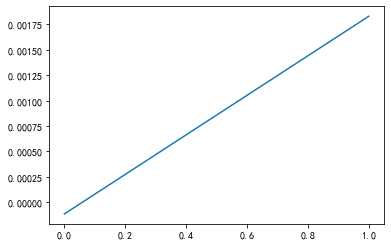

In [516]:
plt.plot(aaalh)

In [272]:
aaa.shape

(70,)

In [174]:
np.mean(rrr)/np.std(rrr)

-0.030056394206430585

In [156]:
BETA.shape

torch.Size([250, 70])

In [162]:
ReSP.shape

torch.Size([250, 70])

In [157]:
on=((BETA-BETA.mean(1).view(250,1))*(ReSP-ReSP.mean(1).view(250,1))).sum(1)

In [158]:
under=((BETA-BETA.mean(1).view(250,1))*(BETA-BETA.mean(1).view(250,1))).sum(1)

In [159]:
b=(on/under)

In [160]:
a=ReSP.mean(1)-BETA.mean(1)*(b.view(250))

In [161]:
a.mean()

tensor(0.0004, device='cuda:0')

In [27]:
a.var()

tensor(3.4432e-05, device='cuda:0')

In [29]:
a.mean()/(a.var()).sqrt()

tensor(0.0746, device='cuda:0')

In [30]:
from scipy import stats as ss 
ss.ttest_1samp(a.tolist(),0)

Ttest_1sampResult(statistic=1.1793318913367148, pvalue=0.23939163738389366)

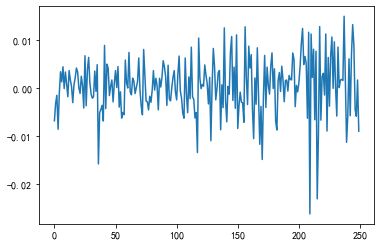

In [31]:
plt.plot(a.tolist())

##  相互检验

In [176]:
R_r=b

In [195]:
X=sm.add_constant((ReOEF.view(250)).tolist())
Y=np.array((R_r.view(250)).tolist()).reshape(250)
model = sm.OLS(Y,X)
results = model.fit()

In [197]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           3.15e-45
Time:                        13:24:36   Log-Likelihood:                 984.16
No. Observations:                 250   AIC:                            -1964.
Df Residuals:                     248   BIC:                            -1957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.012      0.312      -0.001       0.000
x1             0.5786      0.033     17.508      0.000       0.513       0.644
==============================================================================
Omnibus:                       24.315   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.905
Skew:                          -0.391   Prob(JB):                     8.05e-15
Kurtosis:                       5.371   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
X=sm.add_constant((R_r.view(250)).tolist())
Y=np.array((ReOEF.view(250)).tolist()).reshape(250)
model = sm.OLS(Y,X)
results = model.fit()

In [217]:
coef=results.params

In [218]:
X=np.array((R_r.view(250)).tolist())
Y=np.array((ReOEF.view(250)).tolist())
Ybar=coef[0]+X*coef[1]

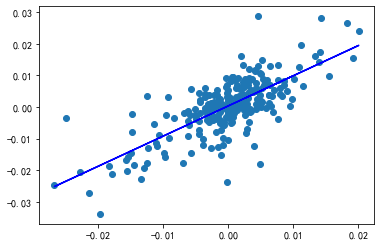

In [227]:
plt.scatter(X,Y)
plt.plot(X,Ybar,color='b')

In [204]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           3.15e-45
Time:                        13:28:08   Log-Likelihood:                 921.46
No. Observations:                 250   AIC:                            -1839.
Df Residuals:                     248   BIC:                            -1832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.935      0.351      -0.000       0.001
x1             0.9554      0.055     17.508      0.000       0.848       1.063
==============================================================================
Omnibus:                       18.194   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.659
Skew:                          -0.148   Prob(JB):                     1.35e-12
Kurtosis:                       5.271   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Zero Beta

In [517]:
Sort=Betas.sort().indices[:-1]

In [518]:
Sort.shape

torch.Size([250, 70])

In [519]:
N=40

In [520]:
Resort=torch.zeros([250,70],device=OEF.device).cuda().detach() 
for i in range(250):
    ReSPi=ReSP[i] #后一天的按照前一天的Beta
    Resort[i]=ReSPi[Sort[i]]    #RESP按照Beta排序

In [521]:
z=np.arange(1,N+1)
zbar=np.mean(z)

In [522]:
k=2/abs(z-zbar).sum()

In [523]:
w=k*(z-zbar)

In [524]:
N2=int(N/2)
WL=-torch.tensor(w[:N2]).cuda().detach() 
WH=torch.tensor(w[N2:]).cuda().detach() 

In [525]:
Resort

tensor([[-0.0067,  0.0102,  0.0111,  ...,  0.0093,  0.0228,  0.0460],
        [-0.0171, -0.0131, -0.0117,  ..., -0.0137, -0.0073, -0.0202],
        [ 0.0022,  0.0032, -0.0153,  ..., -0.0007,  0.0114, -0.0232],
        ...,
        [-0.0021, -0.0306, -0.0064,  ..., -0.0039, -0.0243, -0.0091],
        [ 0.0041,  0.0008,  0.0079,  ..., -0.0020, -0.0086, -0.0097],
        [ 0.0143, -0.0103, -0.0107,  ...,  0.0022, -0.0131, -0.0189]],
       device='cuda:0')

In [526]:
RL=(Resort[:,:N2]*WL).sum(1)

In [527]:
RH=(Resort[:,70-N2:]*WH).sum(1)

In [528]:
RL.shape

torch.Size([250])

In [529]:
sortb=Betas[:-1].sort()[0]

In [530]:
sortbL=sortb[:,:N2]
sortbH=sortb[:,70-N2:]

In [531]:
sortbL.shape

torch.Size([250, 20])

In [532]:
sortbL

tensor([[ 0.0466,  0.1985,  0.3023,  ...,  0.6736,  0.6772,  0.6918],
        [-0.6699, -0.3836, -0.1687,  ...,  0.5964,  0.6234,  0.6254],
        [-1.4432, -1.2657, -0.7989,  ...,  0.5618,  0.6069,  0.6634],
        ...,
        [-1.9503, -0.8766, -0.7119,  ...,  0.1336,  0.1888,  0.1999],
        [-0.8523, -0.5185, -0.3976,  ...,  0.5748,  0.5945,  0.6088],
        [ 0.0156,  0.1075,  0.1391,  ...,  0.6414,  0.6501,  0.6945]],
       device='cuda:0')

In [533]:
betaL=(sortbL*WL).sum(1)
betaH=(sortbH*WH).sum(1)

In [534]:
zerob=RL*(1/betaL)-RH*(1/betaH)

In [535]:
zerob.mean()/(zerob.std())

tensor(-0.0997, device='cuda:0', dtype=torch.float64)

In [538]:
zerob.max()

tensor(1.1534, device='cuda:0', dtype=torch.float64)

In [539]:
from scipy import stats as ss 
ss.ttest_1samp(zerob.tolist(),0)

Ttest_1sampResult(statistic=-1.5762254583769342, pvalue=0.11624347147339317)

In [613]:
BBB=torch.zeros([5,70],device=OEF.device).cuda().detach() 
AAA=torch.zeros([5,70],device=OEF.device).cuda().detach() 
for N in range(5):
    for i in range(70):
        temp=np.polyfit(ReSP[50*N:50*(N+1),i].tolist(),ReOEF[50*N:50*(N+1)].tolist(),deg=1)
        #temp=np.polyfit(ReSP[:,i].tolist(),ReOEF[:].tolist(),deg=1)
        BBB[N,i]=temp[0,0]
        AAA[N,i]=temp[1,0]

In [614]:
ss.ttest_1samp(AAA[0].tolist(),0)

Ttest_1sampResult(statistic=-9.74866622380485, pvalue=1.3181904228614557e-14)

In [615]:
AAA.mean(1)

tensor([-5.0648e-04,  1.4122e-03, -6.5631e-05,  3.5823e-04, -5.8148e-04],
       device='cuda:0')

In [632]:
BBB.shape

torch.Size([5, 70])

In [635]:
BBBB=BBB[0].unsqueeze(0).repeat(50,1)
for i in range(4):
    BBBB=torch.cat((BBBB,BBB[i+1].unsqueeze(0).repeat(50,1)),dim=0)

In [617]:
Betas.shape

torch.Size([251, 70])

In [645]:
N==40
Sort=BBBB.sort().indices
#Sort=Betas.sort().indices[:-1]
Resort=torch.zeros([250,70],device=OEF.device).cuda().detach() 
for i in range(250):
    ReSPi=ReSP[i] #后一天的按照前一天的Beta
    #Resort[i]=ReSPi[Sort[i//50]]    #RESP按照Beta排序
    Resort[i]=ReSPi[Sort[i]]    #RESP按照Beta排序

z=np.arange(1,N+1)
zbar=np.mean(z)

k=2/abs(z-zbar).sum()
w=k*(z-zbar)

N2=int(N/2)
WL=-torch.tensor(w[:N2]).cuda().detach() 
WH=torch.tensor(w[N2:]).cuda().detach() 

RL=(Resort[:,:N2]*WL).sum(1)
RH=(Resort[:,70-N2:]*WH).sum(1)

sortb=BBBB.sort()[0]
sortbL=sortb[:,:N2]
sortbH=sortb[:,70-N2:]

betaL=(sortbL*WL).sum(1)
betaH=(sortbH*WH).sum(1)

zerob=RL*(1/betaL)-RH*(1/betaH)

ss.ttest_1samp(zerob.tolist(),0)

Ttest_1sampResult(statistic=-1.2499329379256705, pvalue=0.21249753628593251)

In [46]:
res=(Return_rates[:,0]-Return_rates[:,9]).tolist()

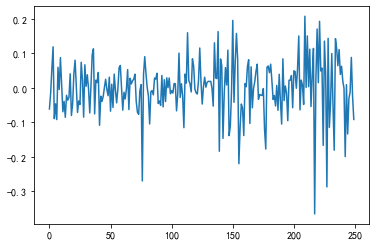

In [16]:
plt.plot(res)

In [17]:
from scipy import stats as ss
ss.ttest_1samp(res,0)

Ttest_1sampResult(statistic=-0.03813015193666765, pvalue=0.9696144634016102)

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
p_value = acorr_ljungbox(res) 

In [19]:
p_value

(array([ 1.52108279,  2.95706198,  3.97108111,  7.3674513 ,  7.66036665,
         7.74151927,  7.90274451, 12.05010884, 16.99052498, 19.98259229,
        23.1212888 , 25.77002757, 26.11357306, 31.99621883, 34.7047572 ,
        34.99964653, 35.42721936, 36.33118628, 37.48061604, 40.41916351,
        40.90441919, 42.6955444 , 46.43682707, 48.28404354, 50.00479457,
        52.91939505, 53.40319531, 57.0212722 , 57.12411684, 57.12701459,
        57.28933776, 57.894211  , 59.49038187, 60.0072482 , 60.35698064,
        66.15875981, 66.57936339, 66.63426617, 66.64231381, 66.7237483 ]),
 array([0.21745571, 0.22797234, 0.26460383, 0.11769817, 0.17597357,
        0.25765848, 0.34124794, 0.14898211, 0.04886456, 0.02941777,
        0.01699171, 0.01156715, 0.01641364, 0.00401101, 0.00270842,
        0.00397474, 0.00546481, 0.00639755, 0.00690538, 0.00441982,
        0.00576169, 0.00514329, 0.00263835, 0.00232742, 0.00212825,
        0.001386  , 0.00179871, 0.00096403, 0.00138822, 0.00202184,
      

In [31]:
Return_rates

tensor([[ 0.0359,  0.0200,  0.0025,  ...,  0.0358,  0.1361,  0.0973],
        [-0.0543, -0.0429, -0.0640,  ..., -0.0244, -0.0236, -0.0382],
        [-0.0012,  0.0022, -0.0067,  ...,  0.0269,  0.0426, -0.0565],
        ...,
        [-0.0605, -0.0856, -0.0908,  ..., -0.0780, -0.1034, -0.1487],
        [-0.0225, -0.0304, -0.0189,  ...,  0.0076, -0.0193,  0.0013],
        [-0.0759, -0.0746, -0.0648,  ..., -0.0392,  0.0516,  0.0158]],
       device='cuda:0')

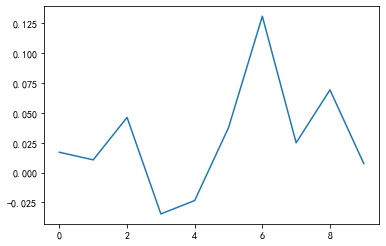

In [35]:
rank=Return_rates[10].tolist()
plt.plot(rank)

In [29]:
from scipy.stats import spearmanr, pearsonr

spearmanr(rank,np.arange(10))

SpearmanrResult(correlation=0.2606060606060606, pvalue=0.4670890543863402)

In [136]:
Betas.shape

torch.Size([251, 70])

In [137]:
Return_rates.shape

torch.Size([250, 10])

In [40]:
sort,sort_index=Betas.sort()

In [50]:
sort_index.shape

torch.Size([251, 70])

In [62]:
N=4680

In [63]:
OEF2=OEF.view(N,-1).cuda().detach()
SP2=SP.view(N,-1).cuda().detach()

In [74]:
SP2[N-1,:]

tensor([4.4286, 4.0107, 3.3952, 3.0136, 3.3213, 4.3047, 3.9744, 3.6366, 3.8718,
        3.6217, 3.5760, 2.8625, 3.2688, 3.5552, 4.2780, 3.8630, 5.2988, 4.4010,
        3.3975, 4.2226, 3.7165, 4.2606, 3.3513, 3.3845, 4.2244, 4.1087, 3.7844,
        3.0906, 3.6572, 2.0156, 3.6326, 3.5620, 4.1671, 4.1958, 4.4592, 3.5880,
        3.4673, 4.0469, 4.0988, 3.4285, 6.1463, 3.5316, 4.5769, 3.8827, 3.8448,
        3.2741, 3.9606, 4.1452, 3.7808, 4.1140, 4.3478, 4.4900, 3.6801, 3.9426,
        4.1380, 3.8924, 3.6949, 3.8920, 3.9665, 4.1393, 3.9635, 4.0443, 2.9544,
        3.9551, 3.8093, 4.3168, 4.5669, 4.0953, 3.8990, 4.3585],
       device='cuda:0', dtype=torch.float64)

In [76]:
(_,sort_index)=torch.sort(Betas)

In [82]:
sort_index[1].view(10,-1)

tensor([[14, 62, 42, 19, 30, 43, 20],
        [33, 56, 67, 53, 54, 35, 38],
        [55, 69, 63, 13, 27, 49, 52],
        [34,  1, 46, 26,  7, 15, 10],
        [17,  6, 29,  5, 59, 41, 57],
        [32, 65, 39, 18, 12, 60, 16],
        [21, 50, 36,  8, 24, 58,  2],
        [37, 48,  9, 44, 23, 22, 66],
        [68, 64, 31, 40, 25, 45,  4],
        [47,  0, 51, 61, 28,  3, 11]], device='cuda:0')

In [94]:
sort=sort_index[1].view(10,-1)

In [92]:
temp=SP2[N-1]
SP2[N-1]

tensor([4.4286, 4.0107, 3.3952, 3.0136, 3.3213, 4.3047, 3.9744, 3.6366, 3.8718,
        3.6217, 3.5760, 2.8625, 3.2688, 3.5552, 4.2780, 3.8630, 5.2988, 4.4010,
        3.3975, 4.2226, 3.7165, 4.2606, 3.3513, 3.3845, 4.2244, 4.1087, 3.7844,
        3.0906, 3.6572, 2.0156, 3.6326, 3.5620, 4.1671, 4.1958, 4.4592, 3.5880,
        3.4673, 4.0469, 4.0988, 3.4285, 6.1463, 3.5316, 4.5769, 3.8827, 3.8448,
        3.2741, 3.9606, 4.1452, 3.7808, 4.1140, 4.3478, 4.4900, 3.6801, 3.9426,
        4.1380, 3.8924, 3.6949, 3.8920, 3.9665, 4.1393, 3.9635, 4.0443, 2.9544,
        3.9551, 3.8093, 4.3168, 4.5669, 4.0953, 3.8990, 4.3585],
       device='cuda:0', dtype=torch.float64)

In [96]:
temp[sort]

tensor([[4.2780, 2.9544, 4.5769, 4.2226, 3.6326, 3.8827, 3.7165],
        [4.1958, 3.6949, 4.0953, 3.9426, 4.1380, 3.5880, 4.0988],
        [3.8924, 4.3585, 3.9551, 3.5552, 3.0906, 4.1140, 3.6801],
        [4.4592, 4.0107, 3.9606, 3.7844, 3.6366, 3.8630, 3.5760],
        [4.4010, 3.9744, 2.0156, 4.3047, 4.1393, 3.5316, 3.8920],
        [4.1671, 4.3168, 3.4285, 3.3975, 3.2688, 3.9635, 5.2988],
        [4.2606, 4.3478, 3.4673, 3.8718, 4.2244, 3.9665, 3.3952],
        [4.0469, 3.7808, 3.6217, 3.8448, 3.3845, 3.3513, 4.5669],
        [3.8990, 3.8093, 3.5620, 6.1463, 4.1087, 3.2741, 3.3213],
        [4.1452, 4.4286, 4.4900, 4.0443, 3.6572, 3.0136, 2.8625]],
       device='cuda:0', dtype=torch.float64)

In [99]:
temp[sort].mean(1)

tensor([3.8948, 3.9648, 3.8066, 3.8987, 3.7512, 3.9773, 3.9334, 3.7996, 4.0173,
        3.8059], device='cuda:0', dtype=torch.float64)

In [43]:
Betas[1]

tensor([2.0850, 0.7336, 1.2555, 2.4102, 1.8321, 0.9310, 0.9094, 0.8201, 1.2150,
        1.3740, 0.8532, 2.5732, 1.0546, 0.6847, 0.2316, 0.8494, 1.1255, 0.8745,
        1.0202, 0.3818, 0.4633, 1.1711, 1.4287, 1.4261, 1.2300, 1.7633, 0.8101,
        0.6952, 2.3336, 0.9265, 0.4338, 1.6380, 0.9801, 0.4749, 0.7304, 0.5877,
        1.2001, 1.3449, 0.6069, 1.0137, 1.7204, 0.9593, 0.3445, 0.4601, 1.4253,
        1.8280, 0.7965, 1.8765, 1.3681, 0.7280, 1.1773, 2.1367, 0.7289, 0.5800,
        0.5875, 0.6218, 0.5078, 0.9704, 1.2384, 0.9566, 1.1195, 2.2673, 0.2324,
        0.6714, 1.6160, 0.9841, 1.5110, 0.5317, 1.5375, 0.6404],
       device='cuda:0')

In [49]:
ReSP[sort_index[1]].shape

torch.Size([70, 70])

In [9]:
ReOEF

tensor([[ 2.3892e-03],
        [-5.1712e-03],
        [ 2.7517e-03],
        [-1.6668e-03],
        [-1.5166e-04],
        [ 4.6909e-03],
        [ 5.8704e-03],
        [ 4.5015e-04],
        [-1.3510e-03],
        [-1.3529e-03],
        [ 2.1037e-03],
        [-3.9104e-03],
        [ 1.6563e-03],
        [ 8.5417e-03],
        [-1.1404e-02],
        [-1.3588e-03],
        [-1.5165e-03],
        [ 3.7801e-03],
        [ 7.6583e-03],
        [ 2.6890e-03],
        [ 8.9472e-04],
        [-4.4726e-04],
        [-4.4746e-04],
        [ 2.9833e-04],
        [-2.4968e-03],
        [-5.2889e-03],
        [-3.3123e-03],
        [ 6.4638e-03],
        [ 7.7612e-03],
        [-5.9488e-04],
        [-1.9358e-03],
        [ 2.0846e-03],
        [-1.9355e-03],
        [-1.9393e-03],
        [-3.8899e-03],
        [-1.5002e-03],
        [-3.3896e-02],
        [ 5.2664e-03],
        [-3.4045e-03],
        [-9.3444e-03],
        [-7.3813e-03],
        [ 1.2877e-02],
        [ 8.7139e-05],
        [ 3

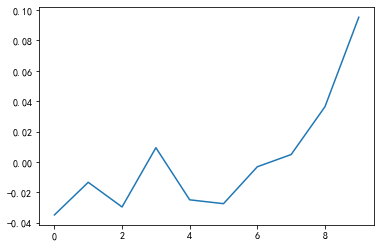

In [126]:
plt.plot(rank)

In [127]:
rank

[-0.034848276525735855,
 -0.013385575264692307,
 -0.029610291123390198,
 0.009385183453559875,
 -0.02491435594856739,
 -0.027448343113064766,
 -0.0031554442830383778,
 0.004895784426480532,
 0.03636819124221802,
 0.09525907039642334]

In [155]:
data_loader = get_dataloader(dataroot)

date_num: 251


SP=SP.view(4680,-1).cuda().detach()  
OEF=OEF.view(4680,-1).cuda().detach()  

In [38]:
(SP,OEF)=next(iter(data_loader))

In [39]:
OEF

tensor([[4.1939, 4.1939, 4.1939,  ..., 4.1904, 4.1904, 4.1904]],
       dtype=torch.float64)

In [15]:
from method.Index_extract import Index_extract

In [16]:
temp=Index_extract(OEF,SP,4680)

In [17]:
temp.SP.shape

torch.Size([4680, 70])

In [445]:
OEF.shape[1]

4680

In [36]:
groups=temp.get_group()

In [37]:
groups

tensor([[31, 52, 36, 43, 33, 35, 47],
        [48, 54, 32, 56, 49, 20, 41],
        [14, 65, 66, 38, 10, 15, 12],
        [62, 29, 63, 67, 13, 42, 27],
        [34, 22, 69, 57, 44, 30, 25],
        [ 1, 51, 19, 21, 50, 16, 26],
        [ 6, 39,  2,  5, 45,  8, 59],
        [68, 64, 58,  0, 60,  7, 37],
        [46, 11, 23, 17,  3,  4,  9],
        [53, 55, 24, 40, 18, 61, 28]], device='cuda:0')

In [33]:
(_,close)=temp.get_close()

In [35]:
close-close

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0', dtype=torch.float64)

In [41]:
close[groups[0]].mean()

tensor(3.7875, device='cuda:0', dtype=torch.float64)

In [48]:
close[groups].sum(1)

torch.Size([10])

In [39]:
close

tensor([4.4453, 4.0041, 3.3891, 3.0503, 3.3496, 4.2955, 3.9762, 3.6283, 3.8681,
        3.6475, 3.5737, 2.8724, 3.2730, 3.5264, 4.2665, 3.8590, 5.2933, 4.3938,
        3.3671, 4.2129, 3.6866, 4.2582, 3.3600, 3.4065, 4.2714, 4.0818, 3.7921,
        3.1023, 3.6470, 2.0295, 3.6225, 3.5593, 4.1520, 4.2008, 4.4698, 3.5771,
        3.4595, 4.0480, 4.0813, 3.4404, 6.1879, 3.5328, 4.5808, 3.8774, 3.8175,
        3.2661, 3.9639, 4.1622, 3.7744, 4.0982, 4.3468, 4.4915, 3.6760, 3.9380,
        4.1435, 3.8743, 3.6831, 3.9100, 3.9784, 4.1372, 3.9780, 4.0547, 2.9315,
        3.9526, 3.8004, 4.3069, 4.6171, 4.0923, 3.9078, 4.3505],
       device='cuda:0', dtype=torch.float64)

In [ ]:
# 计算组合收益率

In [20]:
SP.shape

torch.Size([1, 4680, 70])

In [23]:
K=200
J=30
N=4680
b=K+J

In [24]:
#求K_lag variation

SP_adK=torch.zeros(SP.shape,device=SP.device)
SP_adK[0:N-K,:]=SP[K:N,:]
SP_diffK=SP_adK-SP 

OEF_adK=torch.zeros(OEF.shape,device=OEF.device)
OEF_adK[0:N-K,:]=OEF[K:N,:]
OEF_diffK=OEF_adK-OEF  

cov1K=SP_diffK*OEF_diffK
variat1K=(1/2)*cov1K[0:J].sum(0)+cov1K[J:N-b].sum(0)+(1/2)*cov1K[N-b:N-K].sum(0)

cov2K=OEF_diffK*OEF_diffK
variat2K=(1/2)*cov2K[0:J].sum(0)+cov2K[J:N-b].sum(0)+(1/2)*cov2K[N-b:N-K].sum(0)

#求J_lag variation
SP_adJ=torch.zeros(SP.shape,device=SP.device)
SP_adJ[0:N-J,:]=SP[J:N,:]
SP_diffJ=SP_adJ-SP

OEF_adJ=torch.zeros(OEF.shape,device=OEF.device)
OEF_adJ[0:N-J,:]=OEF[J:N,:]
OEF_diffJ=OEF_adJ-OEF

cov1J=SP_diffJ*OEF_diffJ
variat1J=(1/2)*cov1J[0:K].sum(0)+cov1J[K:N-b].sum(0)+(1/2)*cov1J[N-b:N-J].sum(0)

cov2J=OEF_diffJ*OEF_diffJ
variat2J=(1/2)*cov2J[0:K].sum(0)+cov2J[K:N-b].sum(0)+(1/2)*cov2J[N-b:N-J].sum(0)

#c
c1=1/((1-b/N)*(K-J))*(variat1K-variat1J)
c2=1/((1-b/N)*(K-J))*(variat2K-variat2J)

# beta
beta=c1*(1/c2)

In [25]:
beta

tensor([1.2643, 1.0406, 1.1543, 1.5410, 1.5527, 1.1560, 1.1191, 1.3113, 1.2298,
        1.5733, 0.7665, 1.4044, 0.8328, 0.8897, 0.7074, 0.8143, 1.1121, 1.5277,
        2.1313, 1.0445, 0.6673, 1.0640, 0.9297, 1.5083, 1.6373, 1.0164, 1.1170,
        0.8963, 3.2754, 0.8482, 1.0110, 0.2499, 0.5736, 0.4323, 0.8971, 0.4557,
        0.3801, 1.3283, 0.7504, 1.1491, 1.7805, 0.7050, 0.8952, 0.4005, 1.0039,
        1.2248, 1.3481, 0.5136, 0.5417, 0.6477, 1.0673, 1.0426, 0.3258, 1.5822,
        0.5644, 1.6306, 0.6380, 0.9327, 1.2554, 1.2424, 1.2833, 2.4106, 0.8352,
        0.8704, 1.2478, 0.7280, 0.7392, 0.8856, 1.2453, 0.9323],
       device='cuda:0', dtype=torch.float64)

In [ ]:
# beta排序

In [26]:
(_,sort_index)=torch.sort(beta)

In [27]:
sort_index=sort_index.view(10,-1)

In [28]:
sort_index#从低到高

tensor([[31, 52, 36, 43, 33, 35, 47],
        [48, 54, 32, 56, 49, 20, 41],
        [14, 65, 66, 38, 10, 15, 12],
        [62, 29, 63, 67, 13, 42, 27],
        [34, 22, 69, 57, 44, 30, 25],
        [ 1, 51, 19, 21, 50, 16, 26],
        [ 6, 39,  2,  5, 45,  8, 59],
        [68, 64, 58,  0, 60,  7, 37],
        [46, 11, 23, 17,  3,  4,  9],
        [53, 55, 24, 40, 18, 61, 28]], device='cuda:0')

In [416]:
#当日结算

In [417]:
SP[N-1,:]

tensor([4.4514, 4.0079, 3.3969, 3.0545, 3.3481, 4.2858, 3.9832, 3.6299, 3.8755,
        3.6677, 3.5780, 2.8747, 3.2715, 3.5427, 4.2710, 3.8666, 5.2929, 4.4064,
        3.3759, 4.1936, 3.7038, 4.2529, 3.3675, 3.3895, 4.2698, 4.0848, 3.8080,
        3.1104, 3.6607, 2.0399, 3.6381, 3.5633, 4.1604, 4.2090, 4.4738, 3.5893,
        3.4726, 4.0527, 4.0929, 3.4337, 6.1787, 3.5389, 4.5890, 3.8832, 3.8234,
        3.2843, 3.9682, 4.1636, 3.7732, 4.1107, 4.3473, 4.4948, 3.6796, 3.9299,
        4.1455, 3.8859, 3.6902, 3.9112, 3.9890, 4.1401, 3.9746, 4.0620, 2.9539,
        3.9587, 3.8091, 4.3191, 4.6214, 4.1023, 3.9082, 4.3563],
       device='cuda:0', dtype=torch.float64)

In [411]:
re_SP=SP[N-1,:]-SP[0,:]

In [413]:
re_OEF=OEF[N-1,:]-OEF[0,:]

In [415]:
re_SP

tensor([ 0.0203,  0.0019,  0.0089,  0.0243,  0.0281, -0.0075,  0.0069, -0.0048,
         0.0047,  0.0393,  0.0019,  0.0108, -0.0041, -0.0038, -0.0036,  0.0069,
        -0.0021,  0.0141, -0.0136, -0.0069, -0.0050, -0.0001,  0.0155,  0.0098,
         0.0310, -0.0136,  0.0150,  0.0182,  0.0132,  0.0210, -0.0002,  0.0071,
        -0.0008,  0.0098,  0.0035,  0.0067,  0.0172,  0.0097, -0.0057,  0.0068,
         0.0256,  0.0020,  0.0090,  0.0008, -0.0029,  0.0068,  0.0076,  0.0249,
        -0.0044, -0.0003,  0.0021,  0.0046,  0.0061, -0.0024,  0.0079, -0.0033,
         0.0012,  0.0086,  0.0092,  0.0022,  0.0182,  0.0245,  0.0013,  0.0052,
         0.0040, -0.0008,  0.0593,  0.0072,  0.0141, -0.0010], device='cuda:0',
       dtype=torch.float64)

In [354]:
N-b

4650

In [339]:
cov2J.sum()

tensor(175.7992, device='cuda:0', dtype=torch.float64)

In [342]:
cov2K.sum()

tensor(351.5982, device='cuda:0', dtype=torch.float64)

In [328]:
OEF_diffJ[400]

tensor([-0.0012], device='cuda:0', dtype=torch.float64)

In [333]:
OEF[400+J]

tensor([4.1872], device='cuda:0', dtype=torch.float64)

In [334]:
OEF[400]

tensor([4.1884], device='cuda:0', dtype=torch.float64)

In [301]:
variat2J

tensor([149.4301], device='cuda:0', dtype=torch.float64)

In [276]:
list(OEF_diffK)

[tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], device='cuda:0', dtype=torch.float64),
 tensor([2.1563e-07], de

In [278]:
OEF_diffK[50]

tensor([-0.0004], device='cuda:0', dtype=torch.float64)

In [271]:
SP[0]

tensor([4.4311, 4.0060, 3.3879, 3.0301, 3.3200, 4.2933, 3.9763, 3.6347, 3.8708,
        3.6284, 3.5761, 2.8639, 3.2756, 3.5465, 4.2746, 3.8597, 5.2950, 4.3923,
        3.3895, 4.2005, 3.7087, 4.2531, 3.3520, 3.3796, 4.2388, 4.0984, 3.7930,
        3.0922, 3.6475, 2.0189, 3.6384, 3.5562, 4.1612, 4.1992, 4.4703, 3.5827,
        3.4554, 4.0430, 4.0986, 3.4269, 6.1531, 3.5369, 4.5800, 3.8824, 3.8264,
        3.2775, 3.9606, 4.1387, 3.7776, 4.1110, 4.3452, 4.4902, 3.6735, 3.9322,
        4.1376, 3.8892, 3.6889, 3.9026, 3.9798, 4.1379, 3.9564, 4.0375, 2.9526,
        3.9535, 3.8051, 4.3199, 4.5621, 4.0950, 3.8941, 4.3573],
       device='cuda:0', dtype=torch.float64)

In [259]:
beta

tensor([-4.3799e-06, -2.6490e-06, -4.2636e-06, -3.0803e-06, -3.2896e-06,
        -2.7755e-06, -1.8476e-06, -1.4298e-06, -3.1093e-06, -5.7690e-06,
        -2.3540e-06, -5.9554e-06, -1.6284e-06, -1.3060e-06, -1.5991e-06,
        -3.2578e-06, -2.7480e-06, -4.3917e-06, -1.5906e-06, -2.9414e-06,
        -3.1672e-06, -3.8443e-06, -3.7786e-06, -2.6513e-06, -4.0940e-06,
        -3.7747e-06, -1.2251e-06, -1.1200e-06, -4.7112e-06, -9.1412e-07,
        -1.7798e-06, -3.6357e-06, -2.0546e-06, -1.9550e-06, -1.8708e-06,
        -1.6871e-06, -4.3333e-06, -5.0436e-06, -2.9221e-06, -4.1869e-06,
        -2.5950e-06, -2.1695e-06, -1.2716e-06, -1.0623e-06, -3.2109e-06,
        -2.0800e-06, -2.9734e-06, -5.6252e-06, -4.8176e-06, -2.1070e-06,
        -3.5896e-06, -5.0478e-06, -1.9536e-06, -1.5314e-06, -1.2989e-06,
        -1.6720e-06, -1.2614e-06, -9.4450e-07, -3.2626e-06, -2.7018e-06,
        -3.0409e-06, -5.9887e-06, -4.0843e-08, -8.6741e-07, -3.7609e-06,
        -2.2097e-06, -3.2627e-06, -1.3411e-06, -4.1

In [227]:
variat1K

tensor([0.0013, 0.0007, 0.0011, 0.0010, 0.0009, 0.0007, 0.0006, 0.0005, 0.0008,
        0.0015, 0.0007, 0.0016, 0.0006, 0.0004, 0.0004, 0.0011, 0.0009, 0.0011,
        0.0003, 0.0005, 0.0008, 0.0010, 0.0011, 0.0005, 0.0011, 0.0010, 0.0004,
        0.0003, 0.0013, 0.0004, 0.0006, 0.0010, 0.0006, 0.0006, 0.0005, 0.0005,
        0.0013, 0.0014, 0.0008, 0.0011, 0.0008, 0.0007, 0.0004, 0.0003, 0.0009,
        0.0007, 0.0008, 0.0015, 0.0012, 0.0006, 0.0011, 0.0014, 0.0006, 0.0004,
        0.0004, 0.0004, 0.0004, 0.0002, 0.0009, 0.0007, 0.0009, 0.0016, 0.0001,
        0.0003, 0.0011, 0.0008, 0.0010, 0.0004, 0.0011, 0.0005],
       device='cuda:0', dtype=torch.float64)

In [177]:
SP_ad=torch.zeros(SP.shape,device=SP.device)

In [178]:
SP_ad[0:N-KJ,:]=SP[KJ:N,:]

In [181]:
SP_diff=SP_ad-SP

In [182]:
OEF_ad=torch.zeros(OEF.shape,device=OEF.device)
OEF_ad[0:N-KJ,:]=OEF[KJ:N,:]
OEF_diff=OEF_ad-OEF

In [210]:
cov1=SP_diff*OEF_diff
varK=(1/2)*cov1[0:J].sum(0)+cov1[J:N-b].sum(0)+(1/2)*cov1[N-b:N-K].sum(0)

In [208]:
cov1[J:N-b].shape

torch.Size([4020, 70])

In [197]:
OEF_diff*OEF_diff

tensor([[4.6498e-14],
        [4.6498e-14],
        [4.6498e-14],
        ...,
        [1.7580e+01],
        [1.7580e+01],
        [1.7580e+01]], device='cuda:0', dtype=torch.float64)

In [196]:
OEF_diff

tensor([[ 2.1563e-07],
        [ 2.1563e-07],
        [ 2.1563e-07],
        ...,
        [-4.1928e+00],
        [-4.1928e+00],
        [-4.1928e+00]], device='cuda:0', dtype=torch.float64)

In [119]:
day_loader = get_dataloader(dataroot)

UnboundLocalError: local variable 'dataset' referenced before assignment

In [87]:
pd.read_csv(input_path+'OEF/OEF_TAVG05SEC20070103.csv')['V3'].values

array([4.19388819, 4.19388819, 4.19388819, ..., 4.19044231, 4.19044231,
       4.19044231])

In [88]:
pd.read_csv(input_path+'SP/SP100TAVG05SEC20070103.csv').values

array([[4.45906559, 4.02329599, 3.39785691, ..., 4.08983441, 3.89731529,
        4.35465543],
       [4.45906559, 4.02329599, 3.39785691, ..., 4.08983441, 3.89731529,
        4.35465543],
       [4.45906559, 4.02329599, 3.39785691, ..., 4.08983441, 3.89731529,
        4.35465543],
       ...,
       [4.42864513, 4.01069117, 3.39524386, ..., 4.09534406, 3.89896026,
        4.35850209],
       [4.42864513, 4.01069117, 3.39524386, ..., 4.09534406, 3.89896026,
        4.35850209],
       [4.42864513, 4.01069117, 3.39524386, ..., 4.09534406, 3.89896026,
        4.35850209]])

In [81]:
input_path='input/'

In [4]:
oef1=pd.read_csv(input_path+'OEF_TAVG05SEC20070103.csv',header=0,index_col=0)
oef2=pd.read_csv(input_path+'OEF_TAVG05SEC20070104.csv',header=0,index_col=0)

In [5]:
sp1=pd.read_csv(input_path+'SP100TAVG05SEC20070103.csv',header=0,index_col=None)
sp2=pd.read_csv(input_path+'SP100TAVG05SEC20070104.csv',header=0,index_col=None)

In [6]:
oef2

,V2,V3,V4,V5
V1,,,,
5,103,4.189806,4.189806,0
10,103,4.189806,4.189806,0
15,103,4.189806,4.189806,0
20,103,4.189806,4.189806,0
25,103,4.189806,4.189806,0
...,...,...,...,...
23380,103,4.192832,4.192832,0
23385,103,4.192832,4.192832,0
23390,103,4.192832,4.192832,0


In [7]:
sp1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,...,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70
0,4.459066,4.023296,3.397857,3.021765,3.314342,4.323940,3.980732,3.629925,3.868791,3.630721,3.583241,2.849087,3.264232,3.573188,4.279348,3.861782,5.300714,4.402993,3.412797,4.266475,3.718472,4.282206,3.367985,3.412192,4.233091,...,3.280911,3.995261,4.186316,3.782541,4.126618,4.346529,4.490587,3.688129,3.952013,4.146779,3.883829,3.691376,3.889982,3.986945,4.143135,3.977095,4.057334,2.967847,3.957251,3.812055,4.318954,4.599957,4.089834,3.897315,4.354655
1,4.459066,4.023296,3.397857,3.021765,3.314342,4.323940,3.980732,3.629925,3.868791,3.630721,3.583241,2.849087,3.264232,3.573188,4.279348,3.861782,5.300714,4.402993,3.412797,4.266475,3.718472,4.282206,3.367985,3.412192,4.233091,...,3.280911,3.995261,4.186316,3.782541,4.126618,4.346529,4.490587,3.688129,3.952013,4.146779,3.883829,3.691376,3.889982,3.986945,4.143135,3.977095,4.057334,2.967847,3.957251,3.812055,4.318954,4.599957,4.089834,3.897315,4.354655
2,4.459066,4.023296,3.397857,3.021765,3.314342,4.323940,3.980732,3.629925,3.868791,3.630721,3.583241,2.849087,3.264232,3.573188,4.279348,3.861782,5.300714,4.402993,3.412797,4.266475,3.718472,4.282206,3.367985,3.412192,4.233091,...,3.280911,3.995261,4.186316,3.782541,4.126618,4.346529,4.490587,3.688129,3.952013,4.146779,3.883829,3.691376,3.889982,3.986945,4.143135,3.977095,4.057334,2.967847,3.957251,3.812055,4.318954,4.599957,4.089834,3.897315,4.354655
3,4.459066,4.023296,3.397857,3.021765,3.314342,4.323940,3.980732,3.629925,3.868791,3.630721,3.583241,2.849087,3.264232,3.573188,4.279348,3.861782,5.300714,4.402993,3.412797,4.266475,3.718472,4.282206,3.367985,3.412192,4.233091,...,3.280911,3.995261,4.186316,3.782541,4.126618,4.346529,4.490587,3.688129,3.952013,4.146779,3.883829,3.691376,3.889982,3.986945,4.143135,3.977095,4.057334,2.967847,3.957251,3.812055,4.318954,4.599957,4.089834,3.897315,4.354655
4,4.459066,4.023296,3.397857,3.021765,3.314342,4.323940,3.980732,3.629925,3.868791,3.630721,3.583241,2.849087,3.264232,3.573188,4.279348,3.861782,5.300714,4.402993,3.412797,4.266475,3.718472,4.282206,3.367985,3.412192,4.233091,...,3.280911,3.995261,4.186316,3.782541,4.126618,4.346529,4.490587,3.688129,3.952013,4.146779,3.883829,3.691376,3.889982,3.986945,4.143135,3.977095,4.057334,2.967847,3.957251,3.812055,4.318954,4.599957,4.089834,3.897315,4.354655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,4.428645,4.010691,3.395244,3.013572,3.321312,4.304673,3.974434,3.636620,3.871826,3.621671,3.575991,2.862498,3.268808,3.555205,4.277967,3.863043,5.298805,4.400971,3.397524,4.222591,3.716495,4.260565,3.351307,3.384499,4.224422,...,3.274121,3.960623,4.145196,3.780775,4.113984,4.347823,4.490040,3.680091,3.942552,4.138000,3.892432,3.694862,3.892024,3.966511,4.139318,3.963476,4.044279,2.954389,3.955082,3.809326,4.316821,4.566949,4.095344,3.898960,4.358502
4676,4.428645,4.010691,3.395244,3.013572,3.321312,4.304673,3.974434,3.636620,3.871826,3.621671,3.575991,2.862498,3.268808,3.555205,4.277967,3.863043,5.298805,4.400971,3.397524,4.222591,3.716495,4.260565,3.351307,3.384499,4.224422,...,3.274121,3.960623,4.145196,3.780775,4.113984,4.347823,4.490040,3.680091,3.942552,4.138000,3.892432,3.694862,3.892024,3.966511,4.139318,3.963476,4.044279,2.954389,3.955082,3.809326,4.316821,4.566949,4.095344,3.898960,4.358502
4677,4.428645,4.010691,3.395244,3.013572,3.321312,4.304673,3.974434,3.636620,3.871826,3.621671,3.575991,2.862498,3.268808,3.555205,4.277967,3.863043,5.298805,4.400971,3.397524,4.222591,3.716495,4.260565,3.351307,3.384499,4.224422,...,3.274121,3.960623,4.145196,3.780775,4.113984,4.347823,4.490040,3.680091,3.942552,4.138000,3.892432,3.694862,3.892024,3.966511,4.139318,3.963476,4.044279,2.954389,3.

In [8]:
oefd1=oef1['V3']
oefd2=oef2['V3']

In [75]:
i='V1'

In [11]:
df1=pd.DataFrame()
df1['OEF']=oef1['V3'].values
df1['SPi']=sp1[i].values

df2=pd.DataFrame()
df2['OEF']=oef2['V3'].values
df2['SPi']=sp2[i].values

In [12]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [13]:
df

,OEF,SPi
0,4.193888,4.459066
1,4.193888,4.459066
2,4.193888,4.459066
3,4.193888,4.459066
4,4.193888,4.459066
...,...,...
9355,4.192832,4.451436
9356,4.192832,4.451436
9357,4.192832,4.451436
9358,4.192832,4.451436


In [14]:
dT=4680

In [50]:
# df2-df1
K=400
J=60
b=J+K
N=100000

In [51]:
SPJ=(df-df.shift(J)).apply(lambda x:x.prod(),axis=1).values
dJscale=sum(SPJ[dT-b-1:dT*2-b])-(1/2)*sum(SPJ[dT-b:(2*dT-b+1)])+(1/2)*sum(SPJ[dT-J-1:2*dT-J])

In [52]:
SPK=(df-df.shift(K)).apply(lambda x:x.prod(),axis=1).values
dKscale=sum(SPK[dT-b-1:dT*2-b])-(1/2)*sum(SPK[dT-b:(2*dT-b+1)])+(1/2)*sum(SPK[dT-K-1:2*dT-K])

In [53]:
ci=(1/(1-b/N)*(K-J))*(dKscale-dJscale)*(1/dT)

In [54]:
OEFJ=((df-df.shift(J))['OEF'].values)**2
OEFK=((df-df.shift(K))['OEF'].values)**2
dJOEFscale=sum(OEFJ[dT-b-1:dT*2-b])-(1/2)*sum(OEFJ[dT-b:(2*dT-b+1)])+(1/2)*sum(OEFJ[dT-J-1:2*dT-J])
dKOEFscale=sum(OEFK[dT-b-1:dT*2-b])-(1/2)*sum(OEFK[dT-b:(2*dT-b+1)])+(1/2)*sum(OEFK[dT-K-1:2*dT-K])
cm=(1/(1-b/N)*(K-J))*(dKOEFscale-dJOEFscale)*(1/dT)

In [56]:
bi=ci/cm

In [74]:
'V'+str(1)

'V1'

In [77]:
beta_t=[]
for num in range(1,71):
    i='V'+str(num)
    df1=pd.DataFrame()
    df1['OEF']=oef1['V3'].values
    df1['SPi']=sp1[i].values
    df2=pd.DataFrame()
    df2['OEF']=oef2['V3'].values
    df2['SPi']=sp2[i].values
    df=pd.concat([df1,df2],axis=0,ignore_index=True)
    
    SPJ=(df-df.shift(J)).apply(lambda x:x.prod(),axis=1).values
    dJscale=sum(SPJ[dT-b-1:dT*2-b])-(1/2)*sum(SPJ[dT-b:(2*dT-b+1)])+(1/2)*sum(SPJ[dT-J-1:2*dT-J])
    
    SPK=(df-df.shift(K)).apply(lambda x:x.prod(),axis=1).values
    dKscale=sum(SPK[dT-b-1:dT*2-b])-(1/2)*sum(SPK[dT-b:(2*dT-b+1)])+(1/2)*sum(SPK[dT-K-1:2*dT-K])
    ci=(1/(1-b/N)*(K-J))*(dKscale-dJscale)*(1/dT)
    
    OEFJ=((df-df.shift(J))['OEF'].values)**2
    OEFK=((df-df.shift(K))['OEF'].values)**2
    dJOEFscale=sum(OEFJ[dT-b-1:dT*2-b])-(1/2)*sum(OEFJ[dT-b:(2*dT-b+1)])+(1/2)*sum(OEFJ[dT-J-1:2*dT-J])
    dKOEFscale=sum(OEFK[dT-b-1:dT*2-b])-(1/2)*sum(OEFK[dT-b:(2*dT-b+1)])+(1/2)*sum(OEFK[dT-K-1:2*dT-K])
    cm=(1/(1-b/N)*(K-J))*(dKOEFscale-dJOEFscale)*(1/dT)
    
    bi=ci/cm
    beta_t.append(bi)

In [78]:
beta_t

[2.232923213212134,
 0.8480913544840799,
 1.685098982577912,
 1.9357571545485344,
 2.2232098855957276,
 1.2266587063772945,
 0.8143059924871319,
 1.0868411363681199,
 1.258489956944987,
 1.4004641603123889,
 0.6333945014823872,
 2.9010160767183377,
 1.0043734274417495,
 0.9250139057761344,
 0.49891946939391674,
 0.43599318682485333,
 1.2493135884957467,
 1.3363060645409286,
 0.6160416054672764,
 1.2346937687750885,
 0.1259422816301345,
 1.2835899703073126,
 1.3650028165013586,
 2.159838342276,
 0.7277177701452078,
 1.6412640027344942,
 0.5700650899134273,
 0.7137743063986565,
 2.836115923102888,
 1.702019826739772,
 0.40419847391590413,
 2.1011179406903238,
 1.0022658079445252,
 0.4101868503845105,
 0.8382613022911948,
 0.6326788752319069,
 0.46006314851716673,
 0.9826376712161023,
 0.26314671657484734,
 0.5970547516845109,
 1.6461619443824136,
 0.8412738776991016,
 0.17347777328608474,
 0.5863165987414353,
 2.0486404975403234,
 1.8218077820555896,
 0.4386137104298368,
 2.1528979882854

In [60]:
SPind

'[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48\n 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]'

In [93]:
dKscale

1.3787890691921414e-21

In [77]:
OEFK[dT-b-1:dT*2-b]

4656    0.0
4657    0.0
4658    0.0
4659    0.0
4660    0.0
       ... 
9332    0.0
9333    0.0
9334    0.0
9335    0.0
9336   -0.0
Length: 4681, dtype: float64

In [63]:
temp['m']=temp.apply(lambda x:x.prod(),axis=1)

In [66]:
temp.head(1000)

,OEF,SPi,m
0,NaN,NaN,1.000000e+00
1,NaN,NaN,1.000000e+00
2,NaN,NaN,1.000000e+00
3,NaN,NaN,1.000000e+00
4,NaN,NaN,1.000000e+00
5,NaN,NaN,1.000000e+00
6,NaN,NaN,1.000000e+00
7,NaN,NaN,1.000000e+00
8,NaN,NaN,1.000000e+00
9,NaN,NaN,1.000000e+00
